In [1]:
import pandas as pd

In [2]:
# Let us create a dataframe that we would use for this exercise first
# We will be scraping through the web to do that

# Create url link variable
url_link = "https://en.wikipedia.org/wiki/List_of_highest-grossing_films"

# Create DataFrame
movies_data = pd.read_html(url_link)
# Subset dataframe at index 0- first table
movies_data = movies_data[0]

# Display the first 5 rows of the data
print(movies_data.head())

   Rank Peak                         Title  Worldwide gross  Year          Ref
0     1    1                        Avatar   $2,923,706,026  2009   [# 1][# 2]
1     2    1             Avengers: Endgame   $2,797,501,328  2019   [# 3][# 4]
2     3    3      Avatar: The Way of Water   $2,320,250,281  2022   [# 5][# 6]
3     4    1                       Titanic  T$2,257,844,554  1997   [# 7][# 8]
4     5    3  Star Wars: The Force Awakens   $2,068,223,624  2015  [# 9][# 10]


### DATA INSPECTION

In [3]:
# Get a statistical summary of the data, this is for only the numerical aspect of the data
movies_data.describe()

,Rank,Year
count,50.00000,50.000000
mean,25.50000,2014.540000
std,14.57738,6.273397
min,1.00000,1993.000000
25%,13.25000,2012.000000
50%,25.50000,2016.000000
75%,37.75000,2019.000000
max,50.00000,2023.000000


In [4]:
# Checking the shape of the data showing how many rows and columns are in the data
movies_data.shape

(50, 6)

In [5]:
# This returns the size of the data and its usually number of rows multiplied by number of columns
movies_data.size

300

In [6]:
# Returns concise information about a dataframe
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Peak             50 non-null     object
 2   Title            50 non-null     object
 3   Worldwide gross  50 non-null     object
 4   Year             50 non-null     int64 
 5   Ref              50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [7]:
# Returns the column names in your data
movies_data.columns

Index(['Rank', 'Peak', 'Title', 'Worldwide gross', 'Year', 'Ref'], dtype='object')

In [8]:
# Print the first 10 rows to inspect the data
movies_data.head(10)

,Rank,Peak,Title,Worldwide gross,Year,Ref
0,1,1,Avatar,"$2,923,706,026",2009,[# 1][# 2]
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4]
2,3,3,Avatar: The Way of Water,"$2,320,250,281",2022,[# 5][# 6]
3,4,1,Titanic,"T$2,257,844,554",1997,[# 7][# 8]
4,5,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 9][# 10]
5,6,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 11][# 12]
6,7,6,Spider-Man: No Way Home,"$1,921,847,111",2021,[# 13][# 14]
7,8,3,Jurassic World,"$1,671,537,444",2015,[# 15][# 16]
8,9,7,The Lion King,"$1,656,943,394",2019,[# 17][# 4]
9,10,3,The Avengers,"$1,518,815,515",2012,[# 18][# 19]


In [9]:
# Print the last 10 rows
movies_data.tail(10)

,Rank,Peak,Title,Worldwide gross,Year,Ref
40,41,20,Rogue One: A Star Wars Story,"$1,057,420,387",2016,[# 69][# 70]
41,42,34,Aladdin,"$1,050,693,953",2019,[# 71][# 4]
42,43,6,Pirates of the Caribbean: On Stranger Tides,"$1,045,713,802",2011,[# 72][# 66]
43,44,1,Jurassic Park,"$1,037,535,230",1993,[# 73][# 74]
44,45,24,Despicable Me 3,"$1,034,800,131",2017,[# 75][# 41]
45,46,22,Finding Dory,"$1,028,570,942",2016,[# 76][# 77]
46,47,2,Star Wars: Episode I – The Phantom Menace,"$1,027,082,707",1999,[# 78][# 8]
47,48,5,Alice in Wonderland,"$1,025,468,216",2010,[# 79][# 80]
48,49,24,Zootopia,"$1,023,784,195",2016,[# 81][# 48]
49,50,14,The Hobbit: An Unexpected Journey,"$1,017,030,651",2012,[# 82][# 83]


### DATA CLEANING

In [10]:
# Let us view a portion of the data
movies_data.head()

,Rank,Peak,Title,Worldwide gross,Year,Ref
0,1,1,Avatar,"$2,923,706,026",2009,[# 1][# 2]
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4]
2,3,3,Avatar: The Way of Water,"$2,320,250,281",2022,[# 5][# 6]
3,4,1,Titanic,"T$2,257,844,554",1997,[# 7][# 8]
4,5,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 9][# 10]


In [11]:
# Business cases determine the kind of analysis to be carried out on a dataset
# We do not need the reference column in this data so we will be dropping it

del movies_data["Ref"]

In [12]:
# Change the column name Worldwide gross to Global Gross($)
movies_data.rename(columns={"Worldwide gross":"Global Gross($)"}, inplace=True)

In [13]:
# Proceed to clean the Global Gross($) column so we can have numerical values only for quantitative analysis
movies_data["Global Gross($)"] = movies_data["Global Gross($)"].str.replace("$","")
movies_data["Global Gross($)"] = movies_data["Global Gross($)"].str.replace(",","")

C:\Users\Black Concept\AppData\Local\Temp\ipykernel_4516\3753353550.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies_data["Global Gross($)"] = movies_data["Global Gross($)"].str.replace("$","")


In [14]:
# Let us inspect it to see if we have just numbers alone now
movies_data["Global Gross($)"].unique()

# Some portions of the data still have string vlaues like F, T in them

array(['2923706026', '2797501328', '2320250281', 'T2257844554',
       '2068223624', '2048359754', '1921847111', '1671537444',
       '1656943394', '1518815515', '1515341399', '1495696292',
       '1450026933', '1445638421', '1402809540', '1361973409',
       '1347280838', '1342139727', '1332539889', '1308473425',
       'F1290000000', '1263521126', '1242805359', 'F81238764765',
       '1214811252', '1159444662', '1153337496', '1148528393',
       '1147997407', '1131927996', '1128274794', '1123794079',
       '1108569499', '1104054072', '1081169825', '1074458282',
       '1074144248', '1073394593', '1066970811', '1066179747',
       '1057420387', '1050693953', '1045713802', '1037535230',
       '1034800131', '1028570942', '1027082707', '1025468216',
       '1023784195', '1017030651'], dtype=object)

In [15]:
# We can see that Global Gross($) still has some characters like "F" and "T" that need removing
movies_data["Global Gross($)"] = movies_data["Global Gross($)"].str.replace("T","")
movies_data["Global Gross($)"] = movies_data["Global Gross($)"].str.replace("F","")

In [16]:
# Let us inspect it to see if we have just numbers alone now
movies_data["Global Gross($)"].unique()

array(['2923706026', '2797501328', '2320250281', '2257844554',
       '2068223624', '2048359754', '1921847111', '1671537444',
       '1656943394', '1518815515', '1515341399', '1495696292',
       '1450026933', '1445638421', '1402809540', '1361973409',
       '1347280838', '1342139727', '1332539889', '1308473425',
       '1290000000', '1263521126', '1242805359', '81238764765',
       '1214811252', '1159444662', '1153337496', '1148528393',
       '1147997407', '1131927996', '1128274794', '1123794079',
       '1108569499', '1104054072', '1081169825', '1074458282',
       '1074144248', '1073394593', '1066970811', '1066179747',
       '1057420387', '1050693953', '1045713802', '1037535230',
       '1034800131', '1028570942', '1027082707', '1025468216',
       '1023784195', '1017030651'], dtype=object)

In [17]:
# A quick look at our Title column also reveals special characters that need to be dealt with
movies_data["Title"].unique()

array(['Avatar', 'Avengers: Endgame', 'Avatar: The Way of Water',
       'Titanic', 'Star Wars: The Force Awakens',
       'Avengers: Infinity War', 'Spider-Man: No Way Home',
       'Jurassic World', 'The Lion King', 'The Avengers', 'Furious 7',
       'Top Gun: Maverick', 'Frozen II', 'Barbie †',
       'Avengers: Age of Ultron', 'The Super Mario Bros. Movie †',
       'Black Panther', 'Harry Potter and the Deathly Hallows – Part 2',
       'Star Wars: The Last Jedi', 'Jurassic World: Fallen Kingdom',
       'Frozen', 'Beauty and the Beast', 'Incredibles 2',
       'The Fate of the Furious', 'Iron Man 3', 'Minions',
       'Captain America: Civil War', 'Aquaman',
       'The Lord of the Rings: The Return of the King',
       'Spider-Man: Far From Home', 'Captain Marvel',
       'Transformers: Dark of the Moon', 'Skyfall',
       'Transformers: Age of Extinction', 'The Dark Knight Rises',
       'Joker', 'Star Wars: The Rise of Skywalker', 'Toy Story 4',
       'Toy Story 3', "Pirates

In [18]:
movies_data["Title"] = movies_data["Title"].str.replace("†","") #Remove special characters from the Title column

In [19]:
# Cleaning Peak column for special characters
movies_data["Peak"] = movies_data["Peak"].str.replace("RK","")
movies_data["Peak"] = movies_data["Peak"].str.replace("TS","")
movies_data["Peak"] = movies_data["Peak"].str.replace(".","")

C:\Users\Black Concept\AppData\Local\Temp\ipykernel_4516\2663981244.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies_data["Peak"] = movies_data["Peak"].str.replace(".","")


In [20]:
movies_data["Peak"].unique()

array(['1', '3', '4', '6', '7', '11', '10', '14', '5', '15', '9', '12',
       '20', '2', '24', '23', '31', '32', '30', '43', '34', '22'],
      dtype=object)

In [21]:
# A look at our data also reveals that Peak and Global Gross are objects and we need them in numerical formats
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Peak             50 non-null     object
 2   Title            50 non-null     object
 3   Global Gross($)  50 non-null     object
 4   Year             50 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [22]:
movies_data[["Peak"]] = movies_data[["Peak"]].astype(int)
movies_data[["Global Gross($)"]] = movies_data[["Global Gross($)"]].astype(float)

In [23]:
# Taking a last look at our data, the global gross for the fate of the furious has mysteriously jumped up, let's fix that
movies_data.loc[movies_data["Title"] == "The Fate of the Furious"]

,Rank,Peak,Title,Global Gross($),Year
23,24,11,The Fate of the Furious,8.123876e+10,2017


In [24]:
movies_data['Global Gross($)'].replace(81238764765, 1238764765, inplace=True)

In [25]:
# View the data
movies_data

# Now we have a clean data to work with

,Rank,Peak,Title,Global Gross($),Year
0,1,1,Avatar,2.923706e+09,2009
1,2,1,Avengers: Endgame,2.797501e+09,2019
2,3,3,Avatar: The Way of Water,2.320250e+09,2022
3,4,1,Titanic,2.257845e+09,1997
4,5,3,Star Wars: The Force Awakens,2.068224e+09,2015
5,6,4,Avengers: Infinity War,2.048360e+09,2018
6,7,6,Spider-Man: No Way Home,1.921847e+09,2021
7,8,3,Jurassic World,1.671537e+09,2015
8,9,7,The Lion King,1.656943e+09,2019
9,10,3,The Avengers,1.518816e+09,2012


### ANALYSIS OF THE DATA TO GET INSIGHTS

In [26]:
# What is the highest grossing film of all time worldwide?
gross = movies_data["Global Gross($)"].max()
movies_data[movies_data["Global Gross($)"] == gross]

,Rank,Peak,Title,Global Gross($),Year
0,1,1,Avatar,2.923706e+09,2009


In [27]:
movies_data.groupby("Title")["Global Gross($)"]

In [28]:
# Movies that have grossed over $2 billion worldwide?
movies_data[movies_data["Global Gross($)"] > 2000000000]

,Rank,Peak,Title,Global Gross($),Year
0,1,1,Avatar,2.923706e+09,2009
1,2,1,Avengers: Endgame,2.797501e+09,2019
2,3,3,Avatar: The Way of Water,2.320250e+09,2022
3,4,1,Titanic,2.257845e+09,1997
4,5,3,Star Wars: The Force Awakens,2.068224e+09,2015
5,6,4,Avengers: Infinity War,2.048360e+09,2018


In [29]:
# How many of the top 10 highest grossing films were released in the 21st century?
movies_data[(movies_data["Rank"] < 11) & (movies_data["Year"] > 2001)]

,Rank,Peak,Title,Global Gross($),Year
0,1,1,Avatar,2.923706e+09,2009
1,2,1,Avengers: Endgame,2.797501e+09,2019
2,3,3,Avatar: The Way of Water,2.320250e+09,2022
4,5,3,Star Wars: The Force Awakens,2.068224e+09,2015
5,6,4,Avengers: Infinity War,2.048360e+09,2018
6,7,6,Spider-Man: No Way Home,1.921847e+09,2021
7,8,3,Jurassic World,1.671537e+09,2015
8,9,7,The Lion King,1.656943e+09,2019
9,10,3,The Avengers,1.518816e+09,2012


In [30]:
# Sort the movies by years to uncover trends
gross_year = movies_data.groupby("Year")["Global Gross($)"].sum()
gross_year_sorted = gross_year.sort_values(ascending=False)
gross_year_sorted

Year
2019    1.243737e+10
2015    7.817357e+09
2018    7.095448e+09
2017    4.869626e+09
2012    4.725585e+09
2016    4.263113e+09
2022    3.815947e+09
2011    3.511648e+09
2009    2.923706e+09
2023    2.807612e+09
2013    2.504811e+09
1997    2.257845e+09
2010    2.092439e+09
2021    1.921847e+09
2003    1.147997e+09
2014    1.104054e+09
2006    1.066180e+09
1993    1.037535e+09
1999    1.027083e+09
Name: Global Gross($), dtype: float64

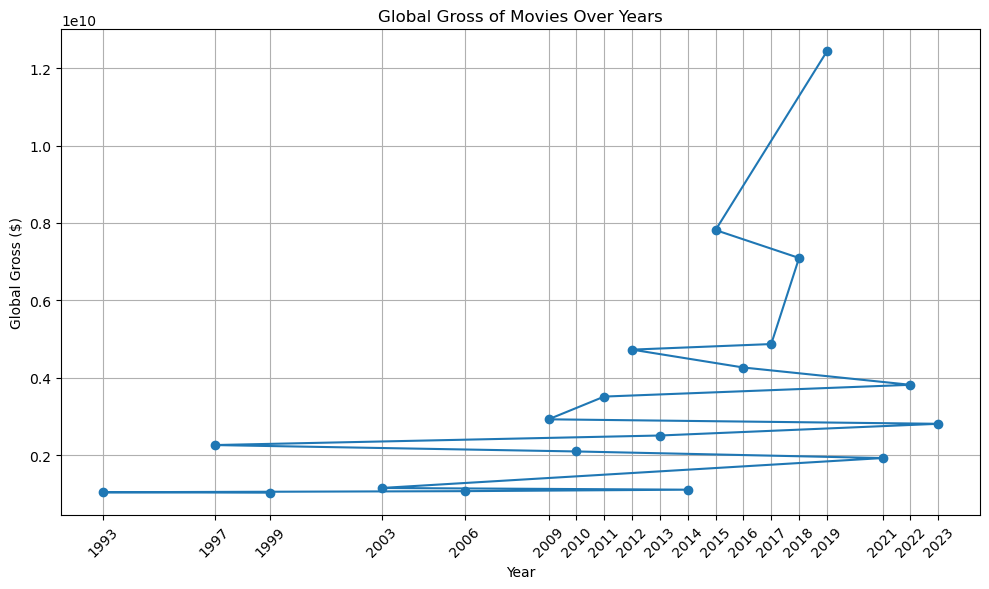

In [31]:
# Import matplotlib for plotting the result
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(gross_year_sorted.index, gross_year_sorted.values, marker='o', linestyle='-')
plt.title('Global Gross of Movies Over Years')
plt.xlabel('Year')
plt.ylabel('Global Gross ($)')
plt.grid(True)
plt.xticks(gross_year_sorted.index, rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Export file as as csv file
movies_data.to_csv("Movies Data")